In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
URL = 'https://raw.githubusercontent.com/chandanc5525/Python-Machine_Learning/main/Machine%20Learning/3-%20Classification/K-Nearest%20Neighbors%20(KNN)/Social_Network_Ads.csv'

In [3]:
dataset = pd.read_csv(URL)
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
#fitting KNN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
#predict test set result
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

<ipython-input-9-53a2742aea4b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


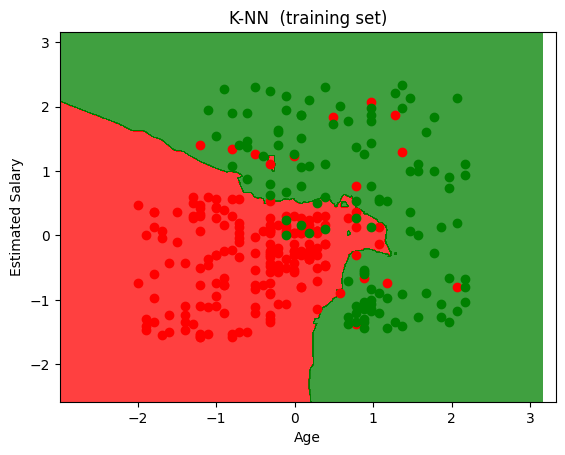

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step=0.01), 
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap= ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X1.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], 
                c= ListedColormap(('red', 'green'))(i), label= j)

plt.title('K-NN  (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

<ipython-input-10-cbbf8132da6a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


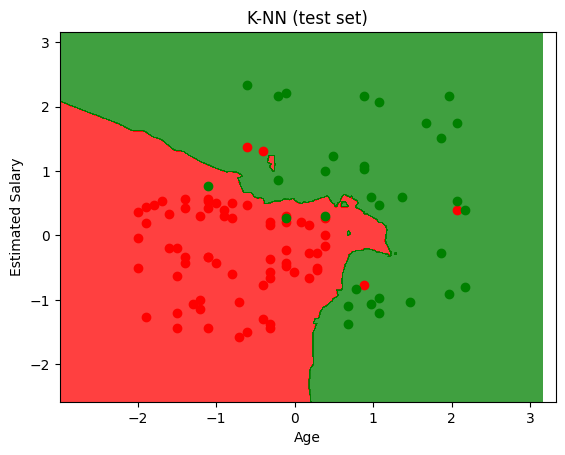

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step=0.01), 
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap= ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X1.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], 
                c= ListedColormap(('red', 'green'))(i), label= j)

plt.title('K-NN (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

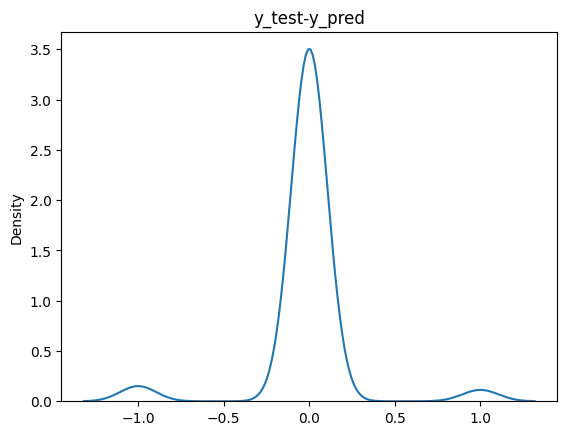

In [11]:
import seaborn as sns
sns.kdeplot(y_test-y_pred)
plt.title('y_test-y_pred')
plt.show()